In [1]:
# Loan Prediction Data problem is classification problem and to be resolved using Decision Tree & Logistic Regression

In [3]:
# required libraries
import pandas as pd

In [4]:
# read the dataset
data = pd.read_csv('train_file.csv')
print('Column Names:')
print(data.columns)

Column Names:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [5]:
print(data.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
train_df = data.drop(columns=['Loan_ID']) ## Dropping Loan ID
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']

In [9]:
train_df.groupby('Loan_Status').size()

Loan_Status
N    192
Y    422
dtype: int64

In [10]:
train_df.groupby('Gender').size()

Gender
Female    112
Male      489
dtype: int64

In [11]:
## Calling a class for numerical fields
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [12]:
### Importing Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

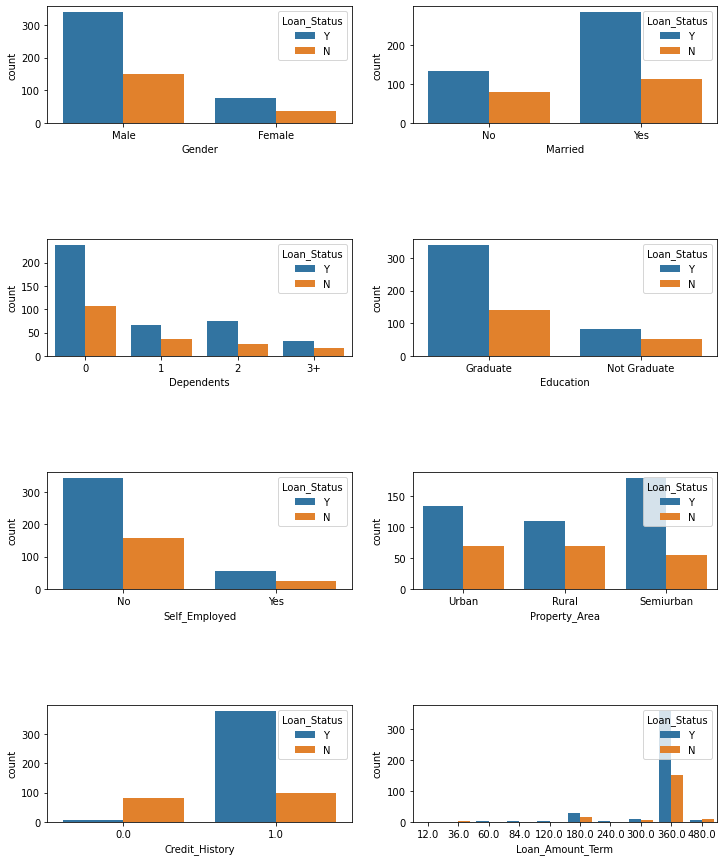

In [13]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


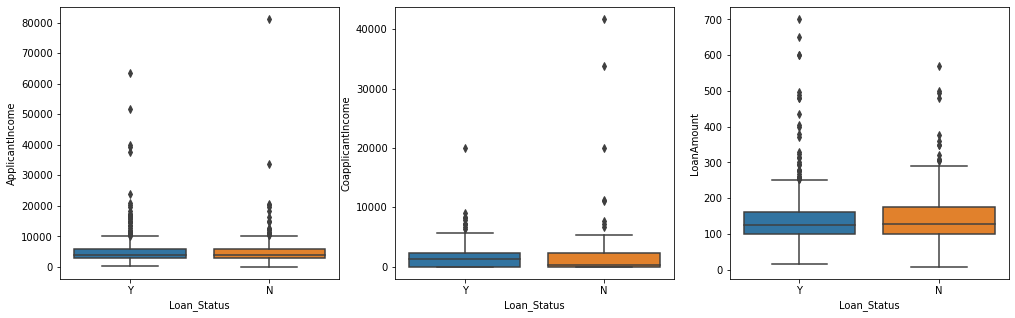

In [14]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=train_df,x='Loan_Status',ax=axes[idx])

print(train_df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

In [15]:
# Encoding Categorical Feature
train_df_encoded = pd.get_dummies(train_df,drop_first=True)
train_df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [16]:
# Split Predictable Features and Target Variables
X = train_df_encoded.drop(columns='Loan_Status_Y')
y = train_df_encoded['Loan_Status_Y']

In [17]:
# train-test-split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
# Handling/Imputing Missing values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

In [19]:
# Decision Tree Classifier. Let’s build one using sklearn with a maximum depth of 5
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score

In [20]:
mod_dt = DecisionTreeClassifier(max_depth = 5, random_state = 1)
mod_dt.fit(X_train,y_train)
dt_prediction = mod_dt.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,dt_prediction))
print("Training Data F1 Score ", f1_score(y_train,dt_prediction))
print("Test Mean F1 Score: ",cross_val_score(mod_dt,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Test Mean Accuracy: ",cross_val_score(mod_dt,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  0.8370672097759674
Training Data F1 Score  0.8936170212765957
Test Mean F1 Score:  0.6792333993548213
Test Mean Accuracy:  0.7677386105957533


In [21]:
# We can see Training Scores are much higher than the test scores. This overfitting can be reduced by hyper parameter tuning

# Max_Depth
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

In [22]:
for depth in range(1,20):
    mod_dt = DecisionTreeClassifier(max_depth=depth)
    mod_dt.fit(X_train,y_train)
    y_training_pred = mod_dt.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(mod_dt,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(mod_dt,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)

<AxesSubplot:xlabel='Max_Depth', ylabel='Values'>

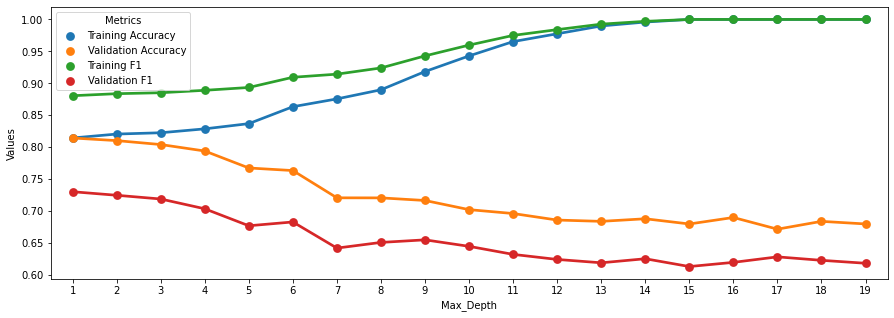

In [23]:
Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [24]:
# From above graph, we can conclude that keeping 'Max_Depth' = 4 will yield optimum Test accuracy and F1 score

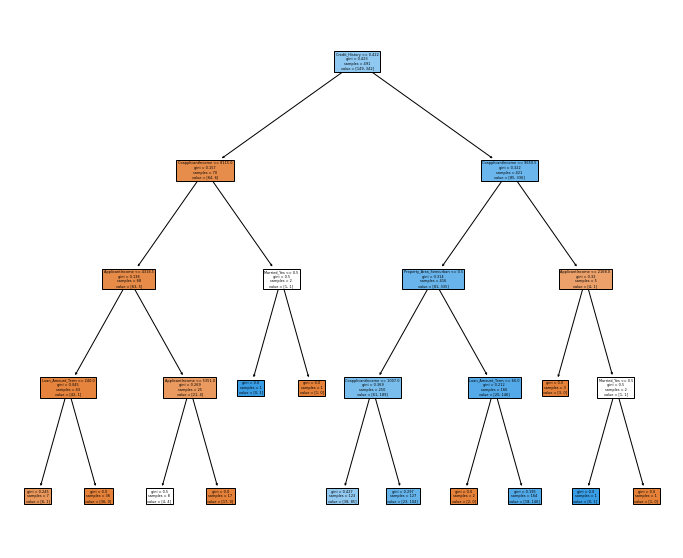

In [25]:
# Let's plot the Decision Tree
mod_dt = DecisionTreeClassifier(max_depth = 4, random_state = 1)
mod_dt.fit(X_train,y_train)
plt.figure(figsize = (12,10))
plot_tree(mod_dt, feature_names = X.columns.tolist(), filled = True);

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.7886178861788617
Test F1 Score:  0.8586956521739131
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,18,25,43
1,1,79,80
All,19,104,123


In [27]:
# Let's use logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model = LogisticRegression()

In [30]:
model.fit(X_train, y_train)

LogisticRegression()

In [31]:
ypred = model.predict(X_test_imp)
print(ypred)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1]


In [32]:
evaluation = f1_score(y_test, ypred)

In [33]:
evaluation

0.8524590163934427

In [ ]:
# End of File